In [158]:
import matplotlib.pyplot as plt
import torch
import torchvision
from torch import nn
from torchvision import transforms
import torch.nn.functional as F

from MNISTModel import Feedforward

In [159]:
mnist_dataset = torchvision.datasets.MNIST('./data', download=True, train=True, transform=transforms.ToTensor())

## Get some image

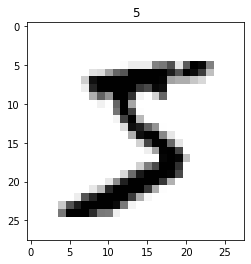

In [160]:
image = torch.Tensor(mnist_dataset[0][0])
plt.imshow(mnist_dataset[0][0].numpy().squeeze(), cmap="binary")
plt.title(mnist_dataset[0][1])
plt.show()

## Our goal is to create image similar to this, but misclassified as 8

In [161]:
target = torch.LongTensor([8])

## SIMPLE mnist feed forward model

In [162]:
ffn = Feedforward()
ffn.load_state_dict(torch.load("./models/mnist.pt", map_location="cpu"))

<All keys matched successfully>

## Find adversarial example via gradient descent

In [163]:
loss_function = nn.CrossEntropyLoss()

num_epochs = 110
eps = 0.001
losses = []
accuracies = []
lrs = []
for epoch in range(num_epochs):
    image.requires_grad = True

    output = ffn(image.reshape(1, -1))
    loss = loss_function(output.reshape(1, -1), target)

    ffn.zero_grad()
    loss.backward(retain_graph=True)

    img_grad = image.grad.data

    image = torch.clip(image - eps * img_grad.sign(), 0, 1).detach()

    print(f'epoch: [{epoch + 1}/{num_epochs}], loss: {loss}')
    losses.append(loss)

epoch: [1/110], loss: 20.495723724365234
epoch: [2/110], loss: 20.245330810546875
epoch: [3/110], loss: 19.99039649963379
epoch: [4/110], loss: 19.73032569885254
epoch: [5/110], loss: 19.463327407836914
epoch: [6/110], loss: 19.188798904418945
epoch: [7/110], loss: 18.90581512451172
epoch: [8/110], loss: 18.614850997924805
epoch: [9/110], loss: 18.316448211669922
epoch: [10/110], loss: 18.018341064453125
epoch: [11/110], loss: 17.7126522064209
epoch: [12/110], loss: 17.400733947753906
epoch: [13/110], loss: 17.08266830444336
epoch: [14/110], loss: 16.760774612426758
epoch: [15/110], loss: 16.435007095336914
epoch: [16/110], loss: 16.10740852355957
epoch: [17/110], loss: 15.778290748596191
epoch: [18/110], loss: 15.449041366577148
epoch: [19/110], loss: 15.120774269104004
epoch: [20/110], loss: 14.795219421386719
epoch: [21/110], loss: 14.473710060119629
epoch: [22/110], loss: 14.158580780029297
epoch: [23/110], loss: 13.850309371948242
epoch: [24/110], loss: 13.55074691772461
epoch: [2

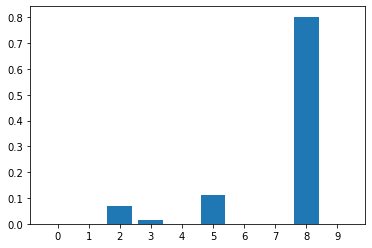

In [164]:
plt.bar(range(10), F.softmax(ffn(image.reshape(1, -1)), dim=1).detach().numpy().squeeze())
plt.xticks(range(10))
plt.show()

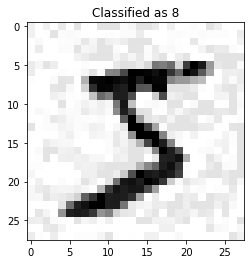

In [165]:
plt.imshow(image.detach().reshape(28, 28), cmap="binary")
plt.title(f"Classified as {ffn(image.reshape(1, -1)).argmax().item()}")
plt.show()